In [45]:
import matplotlib.pyplot as plt
#%matplotlib inline
from matplotlib import collections as mc
import warnings
import numpy as np
import time
import os
from apgl.graph import VertexList
from scipy.io import mmread, mminfo
import networkx as nx 
warnings.filterwarnings('ignore')

In [78]:
def drawlinegraphA(graph, X, algo="Algo"):
    gridsize = (1, len(X))
    fig = plt.figure(figsize=(16, 4))
    for i in range(len(X)):
        ax = plt.subplot2grid(gridsize, (0, i))
        plt.axis('off')
        ax.set_title(algo[i%len(algo)])
    
        ax.set_xlim(min(X[i][:,0]), max(X[i][:,0]))
        ax.set_ylim(min(X[i][:,1]), max(X[i][:,1]))
        lines = []
        e = 0
        for j,k in zip(*graph.nonzero()):
            if j>k:
                lines.append([X[i][j], X[i][k]])
            e += 1
        #print ("Total edges = ", e, " Average Degree:", sum(d for n,d in G.degree()) / float(len(G)))
        lc = mc.LineCollection(lines, linewidths=.3, colors='#0000007f')
        ax.add_collection(lc)
        plt.axis('off')

In [59]:
def drawnetworkxgraph(G, layout, ns, alp):
    plt.axis('off')
    nx.draw_networkx(G, layout, node_size=ns, with_labels=False, alpha=alp)
    

In [92]:
filename = "datasets/input/3elt_dual.mtx" 
#filename = "datasets/input/grid2_dual.mtx" 
#filename = "datasets/input/power.mtx" 
#filename = "datasets/input/sf_ba6000.mtx" 
#filename = "datasets/input/Topics_Graph.mtx"
graph = mmread(filename)
G = nx.Graph()
for i in range(mminfo(filename)[0]):
    G.add_node(i)
for i,j in zip(*graph.nonzero()):
    if i > j:
        G.add_edge(i, j)

In [50]:
G.number_of_edges()

6594

In [51]:
#nx.write_gml(G,"datasets/input/Topics_Graph.gml")

In [52]:
from collections import OrderedDict
def readCoordinatesFromGML(graph):
    gfile = open(graph, "r")
    ofile = open(graph+".txt", "w")
    coordinates = OrderedDict()
    for line in gfile.readlines():
        line = line.strip()
        if "id" in line:
            nid = line.split(" ")[1]
        elif "x" in line:
            x = line.split(" ")[1]
        elif "y" in line:
            y = line.split(" ")[1]
            coordinates[nid] = x + "\t" + y
            ofile.write(coordinates[nid]+"\n")
    gfile.close()
    ofile.close()

In [53]:
readCoordinatesFromGML("datasets/output/3elt_dual.forceatlas2_600.gml")
readCoordinatesFromGML("datasets/output/3elt_dual.forceatlas2_BH_600.gml")
readCoordinatesFromGML("datasets/output/3elt_dual.openord_600.gml")
readCoordinatesFromGML("datasets/output/grid2_dual.forceatlas2_600.gml")
readCoordinatesFromGML("datasets/output/grid2_dual.forceatlas2_BH_600.gml")
readCoordinatesFromGML("datasets/output/grid2_dual.openord_600.gml")
readCoordinatesFromGML("datasets/output/power.forceatlas2_600.gml")
readCoordinatesFromGML("datasets/output/power.forceatlas2_BH_600.gml")
readCoordinatesFromGML("datasets/output/power.openord_600.gml")
readCoordinatesFromGML("datasets/output/sf_ba6000.forceatlas2_600.gml")
readCoordinatesFromGML("datasets/output/sf_ba6000.forceatlas2_BH_600.gml")
readCoordinatesFromGML("datasets/output/sf_ba6000.openord_600.gml")
readCoordinatesFromGML("datasets/output/Topics_Graph.forceatlas2_600.gml")
readCoordinatesFromGML("datasets/output/Topics_Graph.forceatlas2_BH_600.gml")
readCoordinatesFromGML("datasets/output/Topics_Graph.openord_600.gml")

In [54]:
def readCoordinates(filename):
    corfile = open(filename)
    X = []
    for line in corfile.readlines():
        l = line.split("\t")
        X.append([float(l[0]), float(l[1])])
    X = np.array(X)
    corfile.close()
    return X

In [55]:
algo13elt_dual = readCoordinates("datasets/output/3elt_dual.mtxCACHEMINB128PARAOUTRAND600.txt")
algo23elt_dual = readCoordinates("datasets/output/3elt_dual.mtxCACHEMINB256PARAOUTRAND600.txt")
openord3elt_dual = readCoordinates("datasets/output/3elt_dual.openord_600.gml.txt")
forceatlas23elt_dual = readCoordinates("datasets/output/3elt_dual.forceatlas2_600.gml.txt")
forceatlas2bh3elt_dual = readCoordinates("datasets/output/3elt_dual.forceatlas2_BH_600.gml.txt")
tsNET3elt_dual = readCoordinates("datasets/output/3elt_dual.tsNET_600.txt")

In [56]:
algo1power = readCoordinates("datasets/output/power.mtxCACHEMINB128PARAOUTRAND600.txt")
algo2power = readCoordinates("datasets/output/power.mtxCACHEMINB256PARAOUTRAND600.txt")
openordpower = readCoordinates("datasets/output/power.openord_600.gml.txt")
forceatlas2power = readCoordinates("datasets/output/power.forceatlas2_600.gml.txt")
forceatlas2bhpower = readCoordinates("datasets/output/power.forceatlas2_BH_600.gml.txt")
tsNETpower = readCoordinates("datasets/output/power.tsNET_600.txt")

In [30]:
algo1sf_ba6000 = readCoordinates("datasets/output/sf_ba6000.mtxCACHEMINB128PARAOUTRAND600.txt")
algo2sf_ba6000 = readCoordinates("datasets/output/sf_ba6000.mtxCACHEMINB256PARAOUTRAND600.txt")
openordsf_ba6000 = readCoordinates("datasets/output/sf_ba6000.openord_600.gml.txt")
forceatlas2sf_ba6000 = readCoordinates("datasets/output/sf_ba6000.forceatlas2_600.gml.txt")
forceatlas2bhsf_ba6000 = readCoordinates("datasets/output/sf_ba6000.forceatlas2_BH_600.gml.txt")
tsNETsf_ba6000 = readCoordinates("datasets/output/sf_ba6000.tsNET_600.txt")

In [89]:
algo1Topics_Graph = readCoordinates("datasets/output/Topics_Graph.mtxCACHEMINB128PARAOUTRAND600.txt")
algo2Topics_Graph = readCoordinates("datasets/output/Topics_Graph.mtxCACHEMINB256PARAOUTRAND600.txt")
openordTopics_Graph = readCoordinates("datasets/output/Topics_Graph.openord_600.gml.txt")
forceatlas2Topics_Graph = readCoordinates("datasets/output/Topics_Graph.forceatlas2_600.gml.txt")
forceatlas2bhTopics_Graph = readCoordinates("datasets/output/Topics_Graph.forceatlas2_BH_600.gml.txt")
tsNETTopics_Graph = readCoordinates("datasets/output/Topics_Graph.tsNET_600.txt")

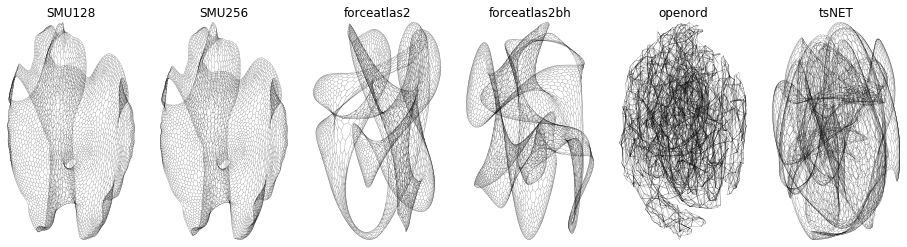

In [79]:
drawlinegraphA(graph, [algo13elt_dual,algo23elt_dual,forceatlas23elt_dual, forceatlas2bh3elt_dual, openord3elt_dual,
                  tsNET3elt_dual], ["SMU128", "SMU256", "forceatlas2", "forceatlas2bh", "openord", "tsNET"])

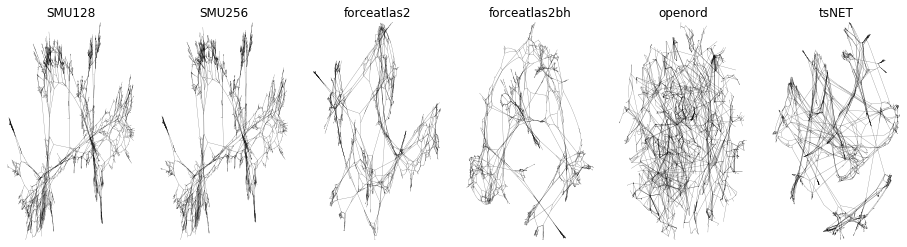

In [82]:
drawlinegraphA(graph, [algo1power,algo2power,forceatlas2power, forceatlas2bhpower, openordpower,
                  tsNETpower], ["SMU128", "SMU256", "forceatlas2", "forceatlas2bh", "openord", "tsNET"])

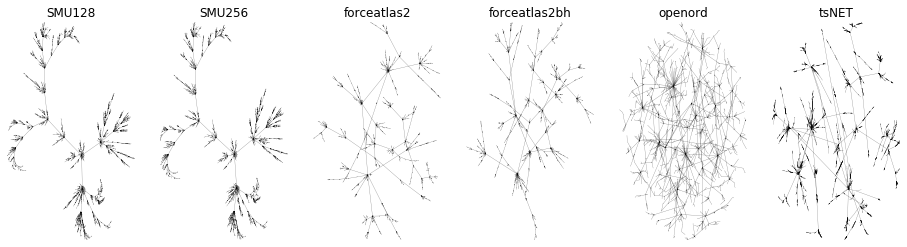

In [84]:
drawlinegraphA(graph, [algo1sf_ba6000,algo2sf_ba6000,forceatlas2sf_ba6000, forceatlas2bhsf_ba6000, openordsf_ba6000,
                  tsNETsf_ba6000], ["SMU128", "SMU256", "forceatlas2", "forceatlas2bh", "openord", "tsNET"])

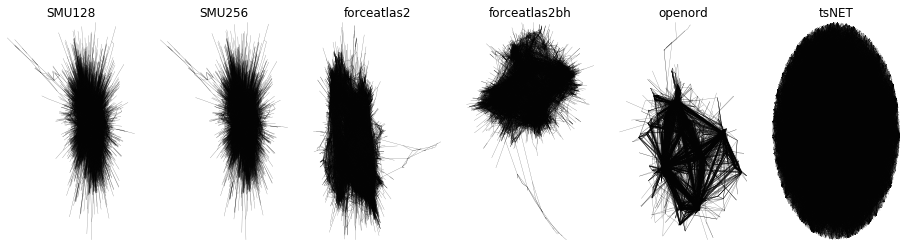

In [90]:
drawlinegraphA(graph, [algo1Topics_Graph,algo2Topics_Graph,forceatlas2Topics_Graph, forceatlas2bhTopics_Graph, 
                       openordTopics_Graph, tsNETTopics_Graph], ["SMU128", "SMU256", "forceatlas2", "forceatlas2bh", "openord", "tsNET"])

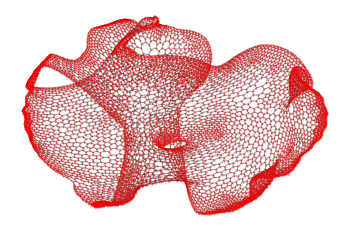

In [93]:
drawnetworkxgraph(G, algo13elt_dual, 1.2, 0.4)

In [33]:
def convertToGraphML(G, pos, filename):
    if len(G) > 0:
        pos = dict(enumerate(pos))
        for node, val in pos.items():
            x = val[0]
            y = val[1]
            G.node[node]['x'] = float(x)
            G.node[node]['y'] = float(y)
    nx.write_graphml(G, filename)

In [94]:
#For future usages
#coordinates = readCoordinates("datasets/output/power.mtxCACHEMINB128PARAOUTRAND600.txt")
#outputgmlfile = "datasets/output/power.mtxCACHEMINB128PARAOUTRAND600.txt.graphml"
#convertToGraphML(G, coordinates, outputgmlfile)
#After this run following perl command
#perl -pe 's/d0/x/g;s/d1/y/g;' power.mtxCACHEMINB128PARAOUTRAND600.txt.graphml > power.mtxCACHEMINB128PARAOUTRAND600.txt.graphml.SMU.graphml
#command = "perl -pe 's/d0/x/g;s/d1/y/g;' " + outputgmlfile +" > "+ outputgmlfile + ".SMU.graphml"
#os.system(command)
#os.system("rm " + outputgmlfile)

In [4]:
GT = nx.Graph()

In [11]:
import pygraphviz as pgv
#g = pgv.AGraph("datasets/input/smaller_network_v3.dot")
g = pgv.AGraph("datasets/input/Topics_Graph.dot")

In [12]:
for i in g:
    #print(i,g[i])
    GT.add_node(i)
    for j in g[i]:
        #print(i,j)
        GT.add_edge(i,j)
print(len(GT.nodes),len(GT.edges))
print(GT.number_of_nodes(), GT.number_of_edges())

5947 26695
5947 26695


In [13]:
#nx.write_gml(GT,"datasets/input/googletopic.gml")

In [14]:
googletopic = open("datasets/input/Topics_Graph.mtx","w")
googletopic.write(str(len(GT.nodes))+" "+str(len(GT.nodes))+" "+ str(len(GT.edges)) + "\n")
for i,j in GT.edges:
    googletopic.write(str(int(j))+ " "+str(int(i)) + "\n")
googletopic.close()

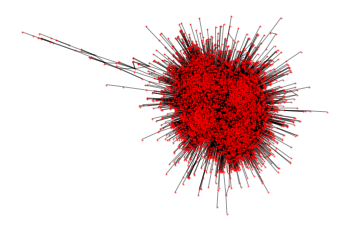

In [44]:
drawnetworkxgraph(G,algo2googletopic, 1.2, 0.4)